# PyFolding SI Notebook 9
---

[Authors] ARL

---

## Example of using weights in fit functions ##

An example of using weights in fit function to bias a fit toward data with lower errors.


In [1]:
%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

# Command imports pyfolding models
from pyfolding.models import *

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


### Create a simple test function and dataset
Make a simple test fit function, a straight line:
$y=mx+c$

In [2]:
class Test(core.FitModel):
    def __init__(self):
        core.FitModel.__init__(self)
        fit_args = self.fit_func_args
        self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
        self.default_params = np.array([1., 0.])
    
    def fit_func(self, x, m, c):
        y = m*x + c
        return y

Now generate a simple dataset, which deviates from a straight line above a certain value of x:

In [15]:
# make a simple dataset to play with...
x = np.linspace(0,10,100)
y = 1.5*x + 2.0
y[x>6] = 1.5*6+2.0


# make the weights large in the region where there is deviation from the linear
w = np.ones((100,)) # linear range, weights are 1
w[x>6] = 100.       # deviation occurs, set weights to 100

### Adding weights to the global fit function ###

Add another property (.weights) to the fit function, which is a tuple of weights (each set of weights should be the length of x). The weights represent the number of standard deviations of error, so larger weights mean more error. I may change this definition in time...

In [4]:
# start by setting up a GlobalFit object
global_fit = pyfolding.GlobalFit()
global_fit.fit_funcs = (Test,)
global_fit.x = (x,) 
global_fit.y = (y,)
global_fit.weights = (w,)
global_fit.ID = ['Test']
global_fit.shared = []
global_fit.initialise()

In [5]:
# find out the order of params for p0
print global_fit.params.keys()

['m_{Test}', 'c_{Test}']


In [6]:
# set some reasonable starting parameters for the fit
p0 = np.array([1.,1.])
#bounds = [[1e6,1e6,1e6], [1e10,1e10,1e9]]

# run the fit and get the results
_,_ = global_fit.fit(p0=p0)
results = global_fit.results

In [7]:
for r in results: 
    r.display()

 Fitting results
 ID: Test
 Model: Test
 Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
 Temperature: 25.00°C

 (f) m 1.49962e+00 ± 1.65441e-01 	 95% CI[1.45780e+00, 1.54144e+00]
 (f) c 2.00093e+00 ± 5.71738e-01 	 95% CI[1.85641e+00, 2.14545e+00]
--------------------------------------------------------------------------------
 R^2: 	0.45590
 DOF: 	98
|SS|: 	4.93e+02




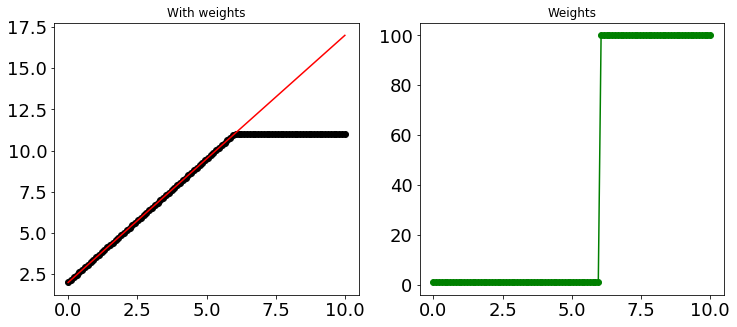

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x,y,'ko')

# plot the fitting curve with the fitted result parameter
for r in results:
    plt.plot(r.x_fit,r.y_fit,'r-')
    plt.title('With weights')
plt.subplot(1,2,2)
plt.plot(x,w,'go-')
plt.title('Weights')
plt.show()

## Now try without weights... ##

In [9]:
# start by setting up a GlobalFit object
global_fit = pyfolding.GlobalFit()
global_fit.fit_funcs = (Test,)
global_fit.x = (x,) 
global_fit.y = (y,)
#global_fit.weights = (w,)
global_fit.ID = ['Test']
global_fit.shared = []
global_fit.initialise()

In [10]:
# find out the order of params for p0
print global_fit.params.keys()

['m_{Test}', 'c_{Test}']


In [11]:
# set some reasonable starting parameters for the fit
p0 = np.array([1.,1.])
#bounds = [[1e6,1e6,1e6], [1e10,1e10,1e9]]

# run the fit and get the results
_,_ = global_fit.fit(p0=p0)
results = global_fit.results

In [12]:
for r in results: 
    r.display()

 Fitting results
 ID: Test
 Model: Test
 Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
 Temperature: 25.00°C

 (f) m 9.69847e-01 ± 3.56695e-02 	 95% CI[9.60831e-01, 9.78863e-01]
 (f) c 3.43258e+00 ± 2.06457e-01 	 95% CI[3.38040e+00, 3.48477e+00]
--------------------------------------------------------------------------------
 R^2: 	0.88296
 DOF: 	98
|SS|: 	1.06e+02




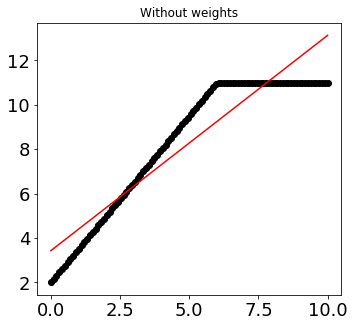

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x,y,'ko')

# plot the fitting curve with the fitted result parameter
for r in results:
    plt.plot(r.x_fit,r.y_fit,'r-')
plt.title('Without weights')
plt.show()